# Fourier Transform

This notebook explores the implementation of Short time fourier transform based metrics of periodicity 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from RiboMetric.modules import metagene_profile

In [2]:
df = pd.read_csv('/home/jack/projects/RibosomeProfiler/sample_data/annotated_read_df.csv')

/tmp/ipykernel_2685498/202280695.py:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/jack/projects/RibosomeProfiler/sample_data/annotated_read_df.csv')


In [5]:
metagene = metagene_profile(
    df,
    target="start",
    distance_range=[15, 100],
)

In [28]:
from scipy.signal import stft

def calculate_stft_from_dict(ribo_seq_signal_dict, sampling_rate, window='hamming', nperseg=256, noverlap=None):
    positions = sorted(ribo_seq_signal_dict.keys())
    signal_values = np.array([ribo_seq_signal_dict[pos] for pos in positions])
    f, t, Zxx = stft(signal_values, fs=sampling_rate, window=window, nperseg=nperseg, noverlap=noverlap)
    return f, t, Zxx



def has_triplet_periodicity_from_dict(ribo_seq_signal_dict, sampling_rate, window='hamming', nperseg=256, noverlap=None, peak_frequency=0.3333, peak_threshold=0.5):
    positions = sorted(ribo_seq_signal_dict.keys())
    signal_values = np.array([ribo_seq_signal_dict[pos] for pos in positions])
    f, t, Zxx = stft(signal_values, fs=sampling_rate, window=window, nperseg=nperseg, noverlap=noverlap)
    triplet_peak_index = np.argmin(np.abs(f - peak_frequency))
    triplet_peak_magnitude = np.max(np.abs(Zxx[triplet_peak_index, :]))
    return triplet_peak_magnitude

In [29]:
magnitudes = {}
for read_len in metagene['start']:
    for i in range(0, max(metagene['start'][read_len])):
        if i not in metagene['start'][read_len]:
            metagene['start'][read_len][i] = 0
    sampling_rate = 1000  # Hz

    # Calculate the STFT
    # frequencies, times, stft_data = calculate_stft_from_dict(metagene['start'][read_len], sampling_rate)
    mag = has_triplet_periodicity_from_dict(metagene['start'][read_len], sampling_rate)
    magnitudes[read_len] = mag
    

[  0.           9.9009901   19.8019802   29.7029703   39.6039604
  49.5049505   59.40594059  69.30693069  79.20792079  89.10891089
  99.00990099 108.91089109 118.81188119 128.71287129 138.61386139
 148.51485149 158.41584158 168.31683168 178.21782178 188.11881188
 198.01980198 207.92079208 217.82178218 227.72277228 237.62376238
 247.52475248 257.42574257 267.32673267 277.22772277 287.12871287
 297.02970297 306.93069307 316.83168317 326.73267327 336.63366337
 346.53465347 356.43564356 366.33663366 376.23762376 386.13861386
 396.03960396 405.94059406 415.84158416 425.74257426 435.64356436
 445.54455446 455.44554455 465.34653465 475.24752475 485.14851485
 495.04950495] 0
[  0.           9.9009901   19.8019802   29.7029703   39.6039604
  49.5049505   59.40594059  69.30693069  79.20792079  89.10891089
  99.00990099 108.91089109 118.81188119 128.71287129 138.61386139
 148.51485149 158.41584158 168.31683168 178.21782178 188.11881188
 198.01980198 207.92079208 217.82178218 227.72277228 237.6237

/home/jack/anaconda3/envs/RibosomeProfiler/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 101, using nperseg = 101
  warnings.warn('nperseg = {0:d} is greater than input length '


Text(0, 0.5, 'Triplet periodicity')

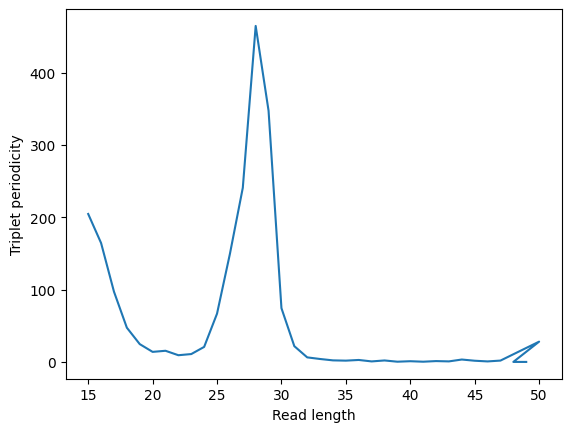

In [25]:
plt.plot(magnitudes.keys(), magnitudes.values())
plt.xlabel('Read length')
plt.ylabel('Triplet periodicity')

In [ ]:
# Visualize the STFT
plt.pcolormesh(times, frequencies, np.abs(stft_data), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()